# ASL Model

David René Langarica Hernández | A01708936

Dataset: https://www.kaggle.com/datasets/grassknoted/asl-alphabet/data

In [54]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.19.0


In [55]:
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale=1./255, 
                                    rotation_range = 20,
                                    width_shift_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode ='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode ='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode ='categorical',
)

Found 15120 images belonging to 7 classes.
Found 4200 images belonging to 7 classes.
Found 1680 images belonging to 7 classes.


In [57]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

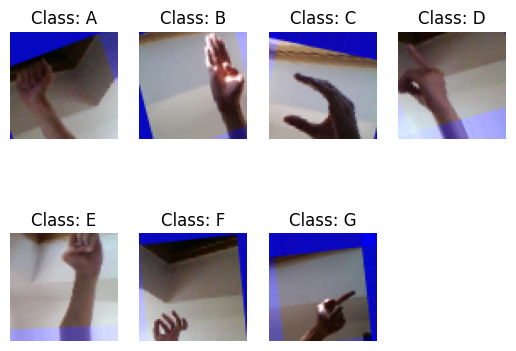

In [58]:
class_examples = {}
num_classes = len(class_names) 

while len(class_examples) < num_classes:
    images, labels = next(train_generator)
    for i in range(len(images)):
        class_idx = np.argmax(labels[i])
        if class_idx not in class_examples and class_idx < num_classes:
            class_examples[class_idx] = images[i]
    
    if len(class_examples) == num_classes:
        break


plt.figure()

for i, class_idx in enumerate(sorted(class_examples.keys())):
    plt.subplot(2, 4, i + 1)
    plt.imshow(class_examples[class_idx])
    plt.title(f'Class: {class_names[class_idx]}')
    plt.axis('off')

plt.show()

In [59]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

In [61]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 55s 113ms/step - accuracy: 0.2545 - loss: 1.8124 - val_accuracy: 0.7798 - val_loss: 0.6707
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 56s 118ms/step - accuracy: 0.5808 - loss: 1.1161 - val_accuracy: 0.8167 - val_loss: 0.5531
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 57s 120ms/step - accuracy: 0.6847 - loss: 0.8288 - val_accuracy: 0.8542 - val_loss: 0.3498
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 57s 121ms/step - accuracy: 0.7469 - loss: 0.6764 - val_accuracy: 0.8250 - val_loss: 0.4730
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 55s 117ms/step - accuracy: 0.7950 - loss: 0.5612 - val_accuracy: 0.8601 - val_loss: 0.4498
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 63s 133ms/step - accuracy: 0.8244 - loss: 0.4841 - val_accuracy: 0.8786 - val_loss: 0.2505
Epoch 7/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 57s 120ms/step - accuracy: 0.8469 - loss: 0.4308 - val_accuracy: 0.8756 - val_loss: 0.2764
Epoch 8/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 55s 116ms/step - accuracy: 0.8623 - loss: 0

In [62]:
test_loss, test_acc = model.evaluate(test_generator)

print('\nTest accuracy:', test_acc)

132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.7842 - loss: 0.9576

Test accuracy: 0.7921428680419922
